## El objetivo de este ejercicio es calcular la función de política óptima epsilon greedy ("epsilon-ávida")
<img src="Epsilon_Greedy_MC.PNG">

In [4]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict
if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [5]:
# vamos a utilizar el ambiente de BlackJack como ejemplo
env = BlackjackEnv()

In [12]:
def make_epsilon_greedy_policy(Q, epsilon, nA):
    """
    Crea una política epsilon-greedy basado en una q-función (función de valor estado-acción) y un epsilon dados.
    
    Argumentos:
        Q: un diccionario que mapea cada estado/observación s a un array de numpy Q[s] = array([v_0, v_1, ... , v_nA]) de longitud nA
        que para un índice a del array contiene el valor v_a de tomar la acción a en el estado s. 
        (en nuestra notación de la clase q(s,a))
         
        epsilon: probabilidad de seleccionar una acción aleatoria (obliga a explorar), valor entre 0 y 1.
        
        nA: número de acciones en el entorno
    
    Retorna:
        Una función que dada una observación como argumento, retorna una política (un array de numpy de longitud nA)
        con probabilidades para cada acción. La política es tal que toma la mejor acción según Q con probabilidad (1-epsilon)
        y toma una acción al azar con probabilidad epsilon
        
    """
    def policy_fn(observation):
        # devolver un array de longitud nA con valores epsilon/nA para todas las acciones
        # excepto para la mejor acción según Q dada esta observación (estado), 
        # que debe tener probabilidad (1 - epsilon + epsilon/nA)
        policy = np.full(nA, epsilon / nA)
        best_action = Q[observation].argmax()
        policy[best_action] += 1 - epsilon
        return policy
        
    return policy_fn

In [70]:
def mc_control_epsilon_greedy(env, num_episodes, discount_factor=1.0, epsilon=0.1):
    """
    Control Monte Carlo utiliando políticas epsilon-greedy
    Encuentra la política epsilon-greedy óptima.
    
    Argumentos:
        env: ambiente de OpenAI gym.
        num_episodes: número de episodios a samplear.
        discount_factor: factor de descuento gama.
        epsilon: probabilidad de samplear una acción aleatoria. Valor entre 0 y 1.
    
    Retorna:
        Una tupla (Q, policy)
        Q es un diccionario que mapea cada estado/observación s a un array de numpy Q[s] = array([v_0, v_1, ... , v_nA]) de longitud nA
        que para un índice a del array contiene el valor v_a de tomar la acción a en el estado s. 
        (en nuestra notación de la clase q(s,a))
        policy es una función que toma una observación/estado como argumento y retorna un array numpy 
        de longitud nA con las probabilidades de cada acción
        
    """
    
    # mantienen la suma y la cantidad de retornos para cada estado
    # para calcular un promedio. Podríamos utilizar un array para guardar todos los retornos
    # también, pero sería más infeciente en términos de espacio
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # La función de valor estado-acción resultante
    # un diccionario que para cada estado devuelve un array de numpy de longitud nA
    # con las probabilidades de cada acción
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    
    # The policy we're following
    # la política que estamos siguiendo
    policy = make_epsilon_greedy_policy(Q, epsilon, env.action_space.n)
        
    for ep in range(num_episodes):
        if ep % 1000 == 0:
            print(ep)
        
        state = env.reset()        
        steps = []
        
        for t in range(100):
            prob_actions = policy(state)
            action = np.random.choice(prob_actions.shape[0], p=prob_actions)
            next_state, reward, done, info = env.step(action)
            steps.append((state, action, reward))
            state = next_state
            if done:
                break
                
        for q in range(t, 0, -1):
            state, action, reward = steps[q]
            
            G = 0
            if (state, action, reward) not in steps[0:q]:
                G = reward + discount_factor * G
                
                if (state, action) in returns_sum:
                    returns_sum[(state, action)] += G
                else:
                    returns_sum[(state, action)] = G
                    
                if (state, action) in returns_count: 
                    returns_count[(state, action)] += 1
                else:
                    returns_count[(state, action)] = 1
                    
                Q[state][action] = returns_sum[(state, action)] / returns_count[(state, action)]
                
   
    # por cada episodio de num_episodes en total
        # paso 1: generar un episodio
        # para ello:
        # resetear el ambiente y obtener el primer estado
        # por cada t de 0 a 99 (limitamos la longitud de los episodios a 100)
            # obtener las probabilidades de la política dado el estado en que estamos
            # hallar la próxima acción según la distribución de la política
            # tomar la acción
            # agregar la tupla (estado, acción, recompensa) al episodio
            # si el episodio acabó: pasar al próximo episodio
            # actualizar el estado en el que estamos para realizar la transición
            
            
        # paso 2: actualizar la función Q con la información del episodio
        # para ello, 
        # por cada tupla (estado, acción) en el episodio
        # (TIP: ES POSIBLE USAR set() para obtener las tuplas únicas (estado, acción)
            # obtener la primera vez que ocurre la tupla
            # sumar todas las recompensas a partir de ese punto descontadas por gama
            # para obtener G, el retorno el episodio
            # en el diccionario returns_sum acumular para la tupla (estado, acción) el retorno obtenido
            # en el diccionario returns_count adicionar una visita a la tupla (estado, acción)
            # actualizar Q[estado][accion] dado los nuevos valores de returns_sum y returns_count
        
        # NOTAR: el diccionario de Q se actualiza en cada episodio, y por lo tanto también se 
        # actualiza la función policy, que utiliza ese diccionario, mirar la última celda de este
        # notebook para entender por qué
    
    
    return Q, policy

In [71]:
Q, policy = mc_control_epsilon_greedy(env, num_episodes=500000, epsilon=0.1)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000


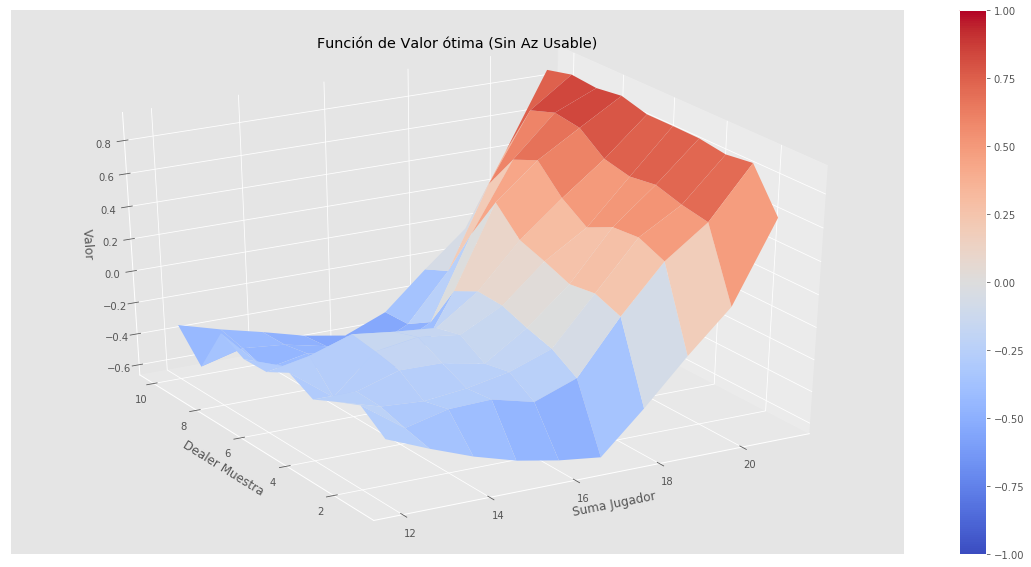

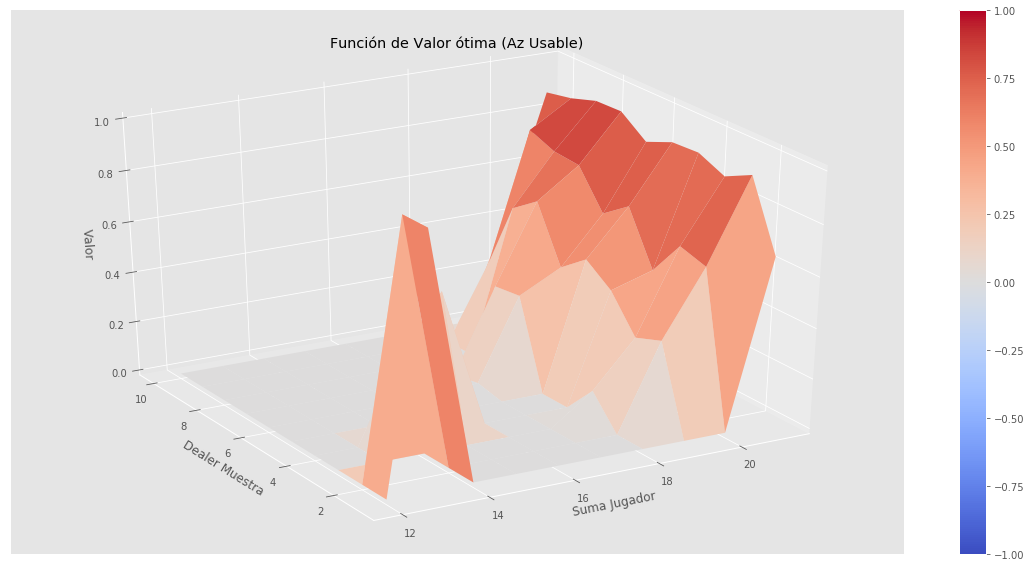

In [73]:
# Para plotear: crear una función valor dada una función valor de estado-acción
# eligiendo la mejor acción en cada estado
V = defaultdict(float)
for state, actions in Q.items():
    action_value = np.max(actions)
    V[state] = action_value
plotting.plot_value_function(V, title="Función de Valor ótima")

In [74]:
# ejemplo de cómo la política se actualiza cuando Q se actualiza
import numpy as np
from collections import defaultdict
tt = defaultdict(lambda: np.zeros(10))
def func_get_back_tt(tt):
    def tt_back(a):
        return tt[a]
    return tt_back
tt_back = func_get_back_tt(tt)
tt[0] += np.ones(10)
print(tt_back(0))
tt[0] += np.ones(10)
print(tt_back(0))


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
